# **`connect_google_drive.py`**


---


In [ ]:
#----------------------------------------------
#             MOUNT GOOGLE DRIVE    
#----------------------------------------------  
from google.colab import drive
drive.mount('/content/drive')
#----------------------------------------------
#           PRINT FILES IN DIRECTORY 
#----------------------------------------------
!ls "/content/drive/My Drive"
!pwd

# **`imports.py`**


---


In [ ]:
#----------------------------------------------
#          IMPORT PYTHON LIBRARIES
#----------------------------------------------
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.spatial
import numpy as np
import urllib.request as urllib2
from sklearn.feature_extraction.text import CountVectorizer
from skimage import io
import difflib
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import copy 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from scipy.stats import pearsonr
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

# **`venn_diagram.py (source github)`**


---


In [ ]:
# coding: utf-8
from itertools import chain
from collections import Iterable
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
import math
class venn():
  default_colors = [
      # r, g, b, a
      [92, 192, 98, 0.5],
      [90, 155, 212, 0.5],
      [246, 236, 86, 0.6],
      [241, 90, 96, 0.4],
      [255, 117, 0, 0.3],
      [82, 82, 190, 0.2],
  ]
  default_colors = [
      [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
      for i in default_colors
  ]

  def draw_ellipse(fig, ax, x, y, w, h, a, fillcolor):
      e = patches.Ellipse(
          xy=(x, y),
          width=w,
          height=h,
          angle=a,
          color=fillcolor)
      ax.add_patch(e)

  def draw_triangle(fig, ax, x1, y1, x2, y2, x3, y3, fillcolor):
      xy = [
          (x1, y1),
          (x2, y2),
          (x3, y3),
      ]
      polygon = patches.Polygon(
          xy=xy,
          closed=True,
          color=fillcolor)
      ax.add_patch(polygon)

  def draw_text(fig, ax, x, y, text, color=[0, 0, 0, 1], fontsize=14, ha="center", va="center"):
      ax.text(
          x, y, text,
          horizontalalignment=ha,
          verticalalignment=va,
          fontsize=fontsize,
          color="black")

  def draw_annotate(fig, ax, x, y, textx, texty, text, color=[0, 0, 0, 1], arrowcolor=[0, 0, 0, 0.3]):
      plt.annotate(
          text,
          xy=(x, y),
          xytext=(textx, texty),
          arrowprops=dict(color=arrowcolor, shrink=0, width=0.5, headwidth=8),
          fontsize=14,
          color=color,
          xycoords="data",
          textcoords="data",
          horizontalalignment='center',
          verticalalignment='center'
      )

  def get_labels(data, fill=["number"]):
      """
      get a dict of labels for groups in data

      @type data: list[Iterable]
      @rtype: dict[str, str]

      input
        data: data to get label for
        fill: ["number"|"logic"|"percent"]

      return
        labels: a dict of labels for different sets

      example:
      In [12]: get_labels([range(10), range(5,15), range(3,8)], fill=["number"])
      Out[12]:
      {'001': '0',
      '010': '5',
      '011': '0',
      '100': '3',
      '101': '2',
      '110': '2',
      '111': '3'}
      """

      N = len(data)

      sets_data = [set(data[i]) for i in range(N)]  # sets for separate groups
      s_all = set(chain(*data))                     # union of all sets

      # bin(3) --> '0b11', so bin(3).split('0b')[-1] will remove "0b"
      set_collections = {}
      for n in range(1, 2**N):
          key = bin(n).split('0b')[-1].zfill(N)
          value = s_all
          sets_for_intersection = [sets_data[i] for i in range(N) if  key[i] == '1']
          sets_for_difference = [sets_data[i] for i in range(N) if  key[i] == '0']
          for s in sets_for_intersection:
              value = value & s
          for s in sets_for_difference:
              value = value - s
          set_collections[key] = value

      labels = {k: "" for k in set_collections}
      if "logic" in fill:
          for k in set_collections:
              labels[k] = k + ": "
      if "number" in fill:
          for k in set_collections:
              labels[k] += str(len(set_collections[k]))
      if "percent" in fill:
          data_size = len(s_all)
          for k in set_collections:
              labels[k] += "(%.1f%%)" % (100.0 * len(set_collections[k]) / data_size)

      return labels

  def venn2(labels, names=['A', 'B'], **options):
      """
      plots a 2-set Venn diagram

      @type labels: dict[str, str]
      @type names: list[str]
      @rtype: (Figure, AxesSubplot)

      input
        labels: a label dict where keys are identified via binary codes ('01', '10', '11'),
                hence a valid set could look like: {'01': 'text 1', '10': 'text 2', '11': 'text 3'}.
                unmentioned codes are considered as ''.
        names:  group names
        more:   colors, figsize, dpi, fontsize

      return
        pyplot Figure and AxesSubplot object
      """
      colors = options.get('colors', [default_colors[i] for i in range(2)])
      figsize = options.get('figsize', (9, 7))
      dpi = options.get('dpi', 96)
      fontsize = options.get('fontsize', 14)

      fig = plt.figure(0, figsize=figsize, dpi=dpi)
      ax = fig.add_subplot(111, aspect='equal')
      ax.set_axis_off()
      ax.set_ylim(bottom=0.0, top=0.7)
      ax.set_xlim(left=0.0, right=1.0)

      # body
      draw_ellipse(fig, ax, 0.375, 0.3, 0.5, 0.5, 0.0, colors[0])
      draw_ellipse(fig, ax, 0.625, 0.3, 0.5, 0.5, 0.0, colors[1])
      draw_text(fig, ax, 0.74, 0.30, labels.get('01', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.26, 0.30, labels.get('10', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.50, 0.30, labels.get('11', ''), fontsize=fontsize)

      # legend
      draw_text(fig, ax, 0.20, 0.56, names[0], colors[0], fontsize=fontsize, ha="right", va="bottom")
      draw_text(fig, ax, 0.80, 0.56, names[1], colors[1], fontsize=fontsize, ha="left", va="bottom")
      leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
      leg.get_frame().set_alpha(0.5)

      return fig, ax

  def venn3(labels, names=['A', 'B', 'C'], **options):
      """
      plots a 3-set Venn diagram

      @type labels: dict[str, str]
      @type names: list[str]
      @rtype: (Figure, AxesSubplot)

      input
        labels: a label dict where keys are identified via binary codes ('001', '010', '100', ...),
                hence a valid set could look like: {'001': 'text 1', '010': 'text 2', '100': 'text 3', ...}.
                unmentioned codes are considered as ''.
        names:  group names
        more:   colors, figsize, dpi, fontsize

      return
        pyplot Figure and AxesSubplot object
      """
      colors = options.get('colors', [default_colors[i] for i in range(3)])
      figsize = options.get('figsize', (9, 9))
      dpi = options.get('dpi', 96)
      fontsize = options.get('fontsize', 14)

      fig = plt.figure(0, figsize=figsize, dpi=dpi,facecolor='white')
      ax = fig.add_subplot(111, aspect='equal')
      ax.set_axis_off()
      ax.set_ylim(bottom=0.0, top=1.0)
      ax.set_xlim(left=0.0, right=1.0)

      # body
      draw_ellipse(fig, ax, 0.333, 0.633, 0.5, 0.5, 0.0, colors[0])
      draw_ellipse(fig, ax, 0.666, 0.633, 0.5, 0.5, 0.0, colors[1])
      draw_ellipse(fig, ax, 0.500, 0.310, 0.5, 0.5, 0.0, colors[2])
      draw_text(fig, ax, 0.50, 0.27, labels.get('001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.73, 0.65, labels.get('010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.61, 0.46, labels.get('011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.27, 0.65, labels.get('100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.39, 0.46, labels.get('101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.50, 0.65, labels.get('110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.50, 0.51, labels.get('111', ''), fontsize=fontsize)

      # legend
      draw_text(fig, ax, 0.15, 0.87, names[0], colors[0], fontsize=fontsize, ha="right", va="bottom")
      draw_text(fig, ax, 0.85, 0.87, names[1], colors[1], fontsize=fontsize, ha="left", va="bottom")
      draw_text(fig, ax, 0.50, 0.02, names[2], colors[2], fontsize=fontsize, va="top")
      leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
      leg.get_frame().set_alpha(0.5)

      return fig, ax

  def venn4(labels, names=['A', 'B', 'C', 'D'], **options):
      """
      plots a 4-set Venn diagram

      @type labels: dict[str, str]
      @type names: list[str]
      @rtype: (Figure, AxesSubplot)

      input
        labels: a label dict where keys are identified via binary codes ('0001', '0010', '0100', ...),
                hence a valid set could look like: {'0001': 'text 1', '0010': 'text 2', '0100': 'text 3', ...}.
                unmentioned codes are considered as ''.
        names:  group names
        more:   colors, figsize, dpi, fontsize

      return
        pyplot Figure and AxesSubplot object
      """
      colors = options.get('colors', [default_colors[i] for i in range(4)])
      figsize = options.get('figsize', (12, 12))
      dpi = options.get('dpi', 96)
      fontsize = options.get('fontsize', 14)

      fig = plt.figure(0, figsize=figsize, dpi=dpi,facecolor='white')
      ax = fig.add_subplot(111, aspect='equal')
      ax.set_axis_off()
      ax.set_ylim(bottom=0.0, top=1.0)
      ax.set_xlim(left=0.0, right=1.0)

      # body
      draw_ellipse(fig, ax, 0.350, 0.400, 0.72, 0.45, 140.0, colors[0])
      draw_ellipse(fig, ax, 0.450, 0.500, 0.72, 0.45, 140.0, colors[1])
      draw_ellipse(fig, ax, 0.544, 0.500, 0.72, 0.45, 40.0, colors[2])
      draw_ellipse(fig, ax, 0.644, 0.400, 0.72, 0.45, 40.0, colors[3])
      draw_text(fig, ax, 0.85, 0.42, labels.get('0001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.68, 0.72, labels.get('0010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.77, 0.59, labels.get('0011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.32, 0.72, labels.get('0100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.71, 0.30, labels.get('0101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.50, 0.66, labels.get('0110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.65, 0.50, labels.get('0111', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.14, 0.42, labels.get('1000', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.50, 0.17, labels.get('1001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.29, 0.30, labels.get('1010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.39, 0.24, labels.get('1011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.23, 0.59, labels.get('1100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.61, 0.24, labels.get('1101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.35, 0.50, labels.get('1110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.50, 0.38, labels.get('1111', ''), fontsize=fontsize)

      # legend
      draw_text(fig, ax, 0.13, 0.18, names[0], colors[0], fontsize=fontsize, ha="right")
      draw_text(fig, ax, 0.18, 0.83, names[1], colors[1], fontsize=fontsize, ha="right", va="bottom")
      draw_text(fig, ax, 0.82, 0.83, names[2], colors[2], fontsize=fontsize, ha="left", va="bottom")
      draw_text(fig, ax, 0.87, 0.18, names[3], colors[3], fontsize=fontsize, ha="left", va="top")
      leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
      leg.get_frame().set_alpha(0.5)

      return fig, ax

  def venn5(labels, names=['A', 'B', 'C', 'D', 'E'], **options):
      """
      plots a 5-set Venn diagram

      @type labels: dict[str, str]
      @type names: list[str]
      @rtype: (Figure, AxesSubplot)

      input
        labels: a label dict where keys are identified via binary codes ('00001', '00010', '00100', ...),
                hence a valid set could look like: {'00001': 'text 1', '00010': 'text 2', '00100': 'text 3', ...}.
                unmentioned codes are considered as ''.
        names:  group names
        more:   colors, figsize, dpi, fontsize

      return
        pyplot Figure and AxesSubplot object
      """
      colors = options.get('colors', [default_colors[i] for i in range(5)])
      figsize = options.get('figsize', (13, 13))
      dpi = options.get('dpi', 96)
      fontsize = options.get('fontsize', 14)

      fig = plt.figure(0, figsize=figsize, dpi=dpi)
      ax = fig.add_subplot(111, aspect='equal')
      ax.set_facecolor((0, 0, 0))
      ax.set_axis_off()
      ax.set_ylim(bottom=0.0, top=1.0)
      ax.set_xlim(left=0.0, right=1.0)

      # body
      draw_ellipse(fig, ax, 0.428, 0.449, 0.87, 0.50, 155.0, colors[0])
      draw_ellipse(fig, ax, 0.469, 0.543, 0.87, 0.50, 82.0, colors[1])
      draw_ellipse(fig, ax, 0.558, 0.523, 0.87, 0.50, 10.0, colors[2])
      draw_ellipse(fig, ax, 0.578, 0.432, 0.87, 0.50, 118.0, colors[3])
      draw_ellipse(fig, ax, 0.489, 0.383, 0.87, 0.50, 46.0, colors[4])
      draw_text(fig, ax, 0.27, 0.11, labels.get('00001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.72, 0.11, labels.get('00010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.55, 0.13, labels.get('00011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.91, 0.58, labels.get('00100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.78, 0.64, labels.get('00101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.84, 0.41, labels.get('00110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.76, 0.55, labels.get('00111', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.51, 0.90, labels.get('01000', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.39, 0.15, labels.get('01001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.42, 0.78, labels.get('01010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.50, 0.15, labels.get('01011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.67, 0.76, labels.get('01100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.70, 0.71, labels.get('01101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.51, 0.74, labels.get('01110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.64, 0.67, labels.get('01111', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.10, 0.61, labels.get('10000', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.20, 0.31, labels.get('10001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.76, 0.25, labels.get('10010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.65, 0.23, labels.get('10011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.18, 0.50, labels.get('10100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.21, 0.37, labels.get('10101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.81, 0.37, labels.get('10110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.74, 0.40, labels.get('10111', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.27, 0.70, labels.get('11000', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.34, 0.25, labels.get('11001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.33, 0.72, labels.get('11010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.51, 0.22, labels.get('11011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.25, 0.58, labels.get('11100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.28, 0.39, labels.get('11101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.36, 0.66, labels.get('11110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.51, 0.47, labels.get('11111', ''), fontsize=fontsize)

      # legend
      draw_text(fig, ax, 0.02, 0.72, names[0], colors[0], fontsize=fontsize, ha="right")
      draw_text(fig, ax, 0.72, 0.94, names[1], colors[1], fontsize=fontsize, va="bottom")
      draw_text(fig, ax, 0.97, 0.74, names[2], colors[2], fontsize=fontsize, ha="left")
      draw_text(fig, ax, 0.88, 0.05, names[3], colors[3], fontsize=fontsize, ha="left")
      draw_text(fig, ax, 0.12, 0.05, names[4], colors[4], fontsize=fontsize, ha="right")
      leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
      leg.get_frame().set_alpha(0.5)

      return fig, ax

  def venn6(labels, names=['A', 'B', 'C', 'D', 'E'], **options):
      """
      plots a 6-set Venn diagram

      @type labels: dict[str, str]
      @type names: list[str]
      @rtype: (Figure, AxesSubplot)

      input
        labels: a label dict where keys are identified via binary codes ('000001', '000010', '000100', ...),
                hence a valid set could look like: {'000001': 'text 1', '000010': 'text 2', '000100': 'text 3', ...}.
                unmentioned codes are considered as ''.
        names:  group names
        more:   colors, figsize, dpi, fontsize

      return
        pyplot Figure and AxesSubplot object
      """
      colors = options.get('colors', [default_colors[i] for i in range(6)])
      figsize = options.get('figsize', (20, 20))
      dpi = options.get('dpi', 96)
      fontsize = options.get('fontsize', 14)

      fig = plt.figure(0, figsize=figsize, dpi=dpi)
      ax = fig.add_subplot(111, aspect='equal')
      ax.set_axis_off()
      ax.set_ylim(bottom=0.230, top=0.845)
      ax.set_xlim(left=0.173, right=0.788)

      # body
      # See https://web.archive.org/web/20040819232503/http://www.hpl.hp.com/techreports/2000/HPL-2000-73.pdf
      draw_triangle(fig, ax, 0.637, 0.921, 0.649, 0.274, 0.188, 0.667, colors[0])
      draw_triangle(fig, ax, 0.981, 0.769, 0.335, 0.191, 0.393, 0.671, colors[1])
      draw_triangle(fig, ax, 0.941, 0.397, 0.292, 0.475, 0.456, 0.747, colors[2])
      draw_triangle(fig, ax, 0.662, 0.119, 0.316, 0.548, 0.662, 0.700, colors[3])
      draw_triangle(fig, ax, 0.309, 0.081, 0.374, 0.718, 0.681, 0.488, colors[4])
      draw_triangle(fig, ax, 0.016, 0.626, 0.726, 0.687, 0.522, 0.327, colors[5])
      draw_text(fig, ax, 0.212, 0.562, labels.get('000001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.430, 0.249, labels.get('000010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.356, 0.444, labels.get('000011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.609, 0.255, labels.get('000100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.323, 0.546, labels.get('000101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.513, 0.316, labels.get('000110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.523, 0.348, labels.get('000111', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.747, 0.458, labels.get('001000', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.325, 0.492, labels.get('001001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.670, 0.481, labels.get('001010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.359, 0.478, labels.get('001011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.653, 0.444, labels.get('001100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.344, 0.526, labels.get('001101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.653, 0.466, labels.get('001110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.363, 0.503, labels.get('001111', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.750, 0.616, labels.get('010000', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.682, 0.654, labels.get('010001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.402, 0.310, labels.get('010010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.392, 0.421, labels.get('010011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.653, 0.691, labels.get('010100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.651, 0.644, labels.get('010101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.490, 0.340, labels.get('010110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.468, 0.399, labels.get('010111', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.692, 0.545, labels.get('011000', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.666, 0.592, labels.get('011001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.665, 0.496, labels.get('011010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.374, 0.470, labels.get('011011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.653, 0.537, labels.get('011100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.652, 0.579, labels.get('011101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.653, 0.488, labels.get('011110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.389, 0.486, labels.get('011111', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.553, 0.806, labels.get('100000', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.313, 0.604, labels.get('100001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.388, 0.694, labels.get('100010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.375, 0.633, labels.get('100011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.605, 0.359, labels.get('100100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.334, 0.555, labels.get('100101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.582, 0.397, labels.get('100110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.542, 0.372, labels.get('100111', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.468, 0.708, labels.get('101000', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.355, 0.572, labels.get('101001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.420, 0.679, labels.get('101010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.375, 0.597, labels.get('101011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.641, 0.436, labels.get('101100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.348, 0.538, labels.get('101101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.635, 0.453, labels.get('101110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.370, 0.548, labels.get('101111', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.594, 0.689, labels.get('110000', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.579, 0.670, labels.get('110001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.398, 0.670, labels.get('110010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.395, 0.653, labels.get('110011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.633, 0.682, labels.get('110100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.616, 0.656, labels.get('110101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.587, 0.427, labels.get('110110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.526, 0.415, labels.get('110111', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.495, 0.677, labels.get('111000', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.505, 0.648, labels.get('111001', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.428, 0.663, labels.get('111010', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.430, 0.631, labels.get('111011', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.639, 0.524, labels.get('111100', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.591, 0.604, labels.get('111101', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.622, 0.477, labels.get('111110', ''), fontsize=fontsize)
      draw_text(fig, ax, 0.501, 0.523, labels.get('111111', ''), fontsize=fontsize)

      # legend
      draw_text(fig, ax, 0.674, 0.824, names[0], colors[0], fontsize=fontsize)
      draw_text(fig, ax, 0.747, 0.751, names[1], colors[1], fontsize=fontsize)
      draw_text(fig, ax, 0.739, 0.396, names[2], colors[2], fontsize=fontsize)
      draw_text(fig, ax, 0.700, 0.247, names[3], colors[3], fontsize=fontsize)
      draw_text(fig, ax, 0.291, 0.255, names[4], colors[4], fontsize=fontsize)
      draw_text(fig, ax, 0.203, 0.484, names[5], colors[5], fontsize=fontsize)
      leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
      leg.get_frame().set_alpha(0.5)

      return fig, ax


# **`handy_functions.py`**


---


In [ ]:
def novelty(user_id,items):
  products = data.loc[data['UserId'] == user_id]
  products = products.set_index('ProductNo')
  rec_items = products.loc[items]['clicks'].tolist()
  return round ( (len(rec_items) - len(np.array(np.nonzero(rec_items)).squeeze())) / len(rec_items),2)


def coverage(total_rec,already_rated):
  
  return round( (len(total_rec) / (4325-already_rated)),3)

def diversity(items):
  matrix = cosine_similarity(np.array(cloth_attr.loc[items]))
  return round(1-np.mean(matrix[np.nonzero(np.triu(matrix,1))]),3)
import re
def lower_dimension_frame2(dataset,attr):
  # initialize category array
  categories = []
  for att in attr:
    # get all unique categories, split them from comma
    for i in dataset[att].unique():
      if type(i) == float:
        i = 'NAN'
      splited_ = re.split('/|,|to|and| |&|-|',i)
      splited_ = [x.lower() for x in splited_]
      for j in range(len(splited_)):
        if splited_[j] not in categories:
          categories.append(splited_[j])

  # create a new array that contains all those categories
  result_frame = pd.DataFrame()
  result_array = np.zeros((len(dataset[attr]),len(categories)))
  for att in attr:
    for i in range(len(dataset[att])):
      if type(dataset[att].tolist()[i]) == float:
        splited_ = 'NAN'.split('/')
      else:
        splited_ = re.split('/|,|to|and| |&|-|',dataset[att].tolist()[i])
        splited_ = [x.lower() for x in splited_]
      for j in range(len(splited_)):
        for k in range(len(categories)):
          if splited_[j] == categories[k]:
            result_array[i][k] = 1

  result_frame = pd.DataFrame(result_array,
                    columns= categories)


  index_frame = dataset['ProductNo'].tolist()
  result_frame['index'] = index_frame
  result_frame = result_frame.set_index('index')
  return result_frame
def lower_dimension_frame(dataset,attr):
  # initialize category array
  categories = []
  for att in attr:
    # get all unique categories, split them from comma
    for i in dataset[att].unique():
      if type(i) == float:
        i = 'NAN'
      splited_ = i.split(',')
      for j in range(len(splited_)):
        if splited_[j] not in categories:
          categories.append(splited_[j])

  # create a new array that contains all those categories
  result_frame = pd.DataFrame()
  result_array = np.zeros((len(dataset[attr]),len(categories)))
  for att in attr:
    for i in range(len(dataset[att])):
      if type(dataset[att].tolist()[i]) == float:
        splited_ = 'NAN'.split(',')
      else:
        splited_ = dataset[att].tolist()[i].split(',')
      for j in range(len(splited_)):
        for k in range(len(categories)):
          if splited_[j] == categories[k]:
            result_array[i][k] = 1

  result_frame = pd.DataFrame(result_array,
                    columns= categories)


  index_frame = dataset['ProductNo'].tolist()
  result_frame['index'] = index_frame
  result_frame = result_frame.set_index('index')
  return result_frame

def user_input_dataset():
  # load dataset to temporary variable
  temp_dataset = data

  # available search words in dataset
  all_searchWords = data['SearchWords'].tolist()

  # make search words to lower case
  all_searchWords = [x.lower() for x in all_searchWords]

  # remove duplicate search words
  all_searchWords = set(all_searchWords)

  # info about search words
  print('There are total: ',len(all_searchWords),' search words ')

  # user searching clothes category
  input_searchWords = input("Please enter your search words:  ")

  # user searching clothes category
  numOf_relatedWords = input("Please enter the number of releated words we wanna search :  ")
  numOf_relatedWords = int(numOf_relatedWords)

  # find matches based on dataset searchwords
  matches = difflib.get_close_matches(input_searchWords, all_searchWords, numOf_relatedWords )

  # print matches
  print('Result found: ',matches)

  # merge result of matches
  dataFrames = []
  for i in matches:
    dataFrames.append(data.loc[data['SearchWords'] == i.upper()])

  # all available clothes based on user search
  totalClothes = pd.concat(dataFrames)

  temp_dataset = totalClothes

  return temp_dataset

def frame_merger(dataset):
  merged_frame = pd.merge(prod_frame,fit_frame,on='index')
  #merged_frame = pd.merge(merged_frame,length_frame,on='index')
  #merged_frame = pd.merge(merged_frame,color_frame,on='index')
  merged_frame = pd.merge(merged_frame,neck_frame,on='index')
  merged_frame = pd.merge(merged_frame,sleeve_frame,on='index')
  merged_frame = pd.merge(merged_frame,search_word_Dataframe,on='index')
  merged_frame['url'] = dataset['ImageSource'].tolist()
  merged_frame['gradeSystem'] = dataset['gradeSystem'].tolist()
  merged_frame['grade'] = dataset['gradeUser'].tolist()
  
  #merged_frame['dashboard'] = dataset['dashboard'].tolist()
  #merged_frame['favorite'] = dataset['favorite'].tolist()
  #merged_frame['clicks'] = dataset['clicks'].tolist()
  url_all = merged_frame['url']
  grades_all = merged_frame['grade'].tolist()
  grade_sys = merged_frame['gradeSystem'].tolist()
  merged_frame = merged_frame.drop(['grade'],axis=1)
  merged_frame = merged_frame.drop(['gradeSystem'],axis=1)
  merged_frame = merged_frame.drop(['url'],axis=1)
  return merged_frame,grades_all,grade_sys,url_all


def recommend_clothes(model):
    # ask query from the user
  feed = user_input_dataset()

  # get all clothes from query (rated and unrated)
  queryFeed = merged_frame.loc[ feed['ProductNo'].tolist() ]

  # get rated clothes from query
  ratedClothes = queryFeed.loc[queryFeed['gradeUser'] !=5]

  # get rated clothes from query
  unratedClothes = queryFeed.loc[queryFeed['gradeUser'] ==5]

  # keep grade system
  gradeSys = unratedClothes['gradeSystem']

  # keep image source
  url = unratedClothes['url']

  # delete grade user == 5
  unratedClothes = unratedClothes.drop(labels='gradeUser',axis=1)

  # delete grade system
  unratedClothes = unratedClothes.drop(labels='gradeSystem',axis=1)

  # delete image source
  unratedClothes = unratedClothes.drop(labels='url',axis=1)

  # predict ratings
  pred = model.predict(unratedClothes)

  # update dataframe with predicted ratings
  unratedClothes['predUser'] = pred

  # update dataframe with grade system
  unratedClothes['gradeSystem'] = gradeSys

  # update dataframe with image source
  unratedClothes['url'] = url

  # get well rated clothes for recommendations
  unratedClothes = unratedClothes.loc[unratedClothes['predUser'] == 1]

  # sort clothes based on grade system
  unratedClothes = unratedClothes.sort_values(by='gradeSystem',ascending=True)
  
  return ratedClothes,unratedClothes


def show_recommended_clothes(unratedClothes):
  # print recommendations
  for i in range(len(unratedClothes)):
    cloth = unratedClothes.iloc[i]
    rec_cloth = cloth['url']
    print('-----------------')  
    image = io.imread(rec_cloth)
    plt.imshow(image)
    plt.show()


def show_liked_clothes(ratedClothes):
  # print liked clothes
  likedClothes = ratedClothes.loc[ratedClothes['gradeUser']>=8]
  for i in range(len(likedClothes)):
    cloth = likedClothes.iloc[i]
    rec_cloth = cloth['url']
    print('-----------------')  
    image = io.imread(rec_cloth)
    plt.imshow(image)
    plt.show()
  
def query_accuracy(ratedClothes,model):
  gradeUser = [1 if x>=8 else 0 for x in ratedClothes['gradeUser'].tolist()]
  pred_frame = ratedClothes
  pred_frame = pred_frame.drop(['gradeUser','gradeSystem','url'],axis=1)
  predUser = model.predict(pred_frame)
  return accuracy_score(gradeUser,predUser)


# **`load_data.py`**


---


In [ ]:
# read dataset 
all_data = pd.read_pickle('/content/drive/My Drive/multi-user5.pkl')
all_data
data = all_data.loc[all_data['UserId'] == 0]
data

,Unnamed: 0,UserId,ProductNo,Crawler,SearchWords,Image,url,ImageSource,SiteClothesHeadline,Color,Gender,Brand,Metadata,ProductCategory,ProductSubcategory,Length,Sleeve,CollarDesign,NeckDesign,Fit,gradeSystem,clicks,gradeUser,favorite,dashboard
0,0,0,0,Asos,SHORTSET,/home/alexandros/Desktop/createCsvDiplo/AsosIm...,https://www.asos.com/in-the-style/in-the-style...,https://images.asos-media.com/products/in-the-...,In The Style x Billie Faiers motif t shirt and...,White,WOMAN,In The Style,Collaboration with influencer Billie Faiers - ...,SET,"SHIRT,T-SHIRT",SHORT LENGTH,SHORT SLEEVE,NO COLLAR,ROUND NECK,RELAXED FIT,0,1,2.5,0,1
1,1,0,1,Asos,SHORTSET,/home/alexandros/Desktop/createCsvDiplo/AsosIm...,https://www.asos.com/bluebella/bluebella-abiga...,https://images.asos-media.com/products/bluebel...,Bluebella Abigail Satin Short Pyjama Set,Pink,WOMAN,BlueBella,You’re invited to this PJ party - Notch lapels...,SET,SET,SHORT LENGTH,SHORT SLEEVE,POLO COLLAR,COLLAR,REGULAR FIT,1,1,5.0,1,1
2,2,0,2,Asos,SHORTSET,/home/alexandros/Desktop/createCsvDiplo/AsosIm...,https://www.asos.com/chelsea-peers/chelsea-pee...,https://images.asos-media.com/products/chelsea...,Chelsea Peers stripe flamingo printed cami sho...,Multi,WOMAN,Chelsea Peers,Tonight's agenda: early night - V-neck - Adjus...,SET,SET,SHORT LENGTH,SLEEVELESS,NO COLLAR,V NECK,REGULAR FIT,2,1,2.5,0,1
3,3,0,3,Asos,SHORTSET,/home/alexandros/Desktop/createCsvDiplo/AsosIm...,https://www.asos.com/lindex/lindex-sou-jenna-s...,https://images.asos-media.com/products/lindex-...,Lindex SoU Jenna spot printed organic cotton t...,Black and white,WOMAN,Lindex,Worn and shot by one of our models at home - P...,SET,"T-SHIRT,SHORT SET",SHORT LENGTH,SHORT SLEEVE,MAO COLLAR,COLLAR,REGULAR FIT,3,1,3.0,0,0
4,4,0,4,Asos,SHORTSET,/home/alexandros/Desktop/createCsvDiplo/AsosIm...,https://www.asos.com/chelsea-peers/chelsea-pee...,https://images.asos-media.com/products/chelsea...,Chelsea Peers abstract leaf print revere pyjam...,Multi,WOMAN,Chelsea Peers,Tonight's agenda: early night - Pyjama set - R...,SET,"SHORT SET,T-SHIRT",SHORT LENGTH,SLEEVELESS,NO COLLAR,COLLAR,REGULAR FIT,4,0,4.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,0,8688,Asos,HALTERNECKPYJAMAS,/home/alexandros/Desktop/createCsvDiplo/AsosIm...,https://www.asos.com/asos-design/asos-design-l...,https://images.asos-media.com/products/asos-de...,ASOS DESIGN lounge pyjama shorts in black with...,Black,WOMAN,ASOS DESIGN,Part of our responsible edit - Branded waistba...,NaN,SHORTS,KNEE LENGTH,LONG SLEEVE,NO COLLAR,OFF SHOULDER,REGULAR FIT,0,0,2.5,0,0
8689,8689,0,8689,Asos,HALTERNECKPYJAMAS,/home/alexandros/Desktop/createCsvDiplo/AsosIm...,https://www.asos.com/asos-design/asos-design-f...,https://images.asos-media.com/products/asos-de...,ASOS DESIGN floral shirt & trouser pyjama set ...,Black floral,WOMAN,ASOS DESIGN,Part of our responsible edit - Floral print - ...,SET,SHIRT,MEDIUM LENGTH,FLARED,MAO COLLAR,COLLAR,REGULAR FIT,0,1,3.0,0,1
8690,8690,0,8690,Asos,HALTERNECKPYJAMAS,/home/alexandros/Desktop/createCsvDiplo/AsosIm...,https://www.asos.com/asos-design/asos-design-m...,https://images.asos-media.com/products/asos-de...,ASOS DESIGN mix & match jersey pyjama cropped ...,Mint,WOMAN,ASOS DESIGN,Entering sleep mode - V-neck - Three-quarter-l...,NaN,TOP,SHORT LENGTH,LONG SLEEVE,NO COLLAR,V NECK,SLIM FIT,0,1,2.5,1,1
8691,8691,0,8691,Asos,HALTERNECKPYJAMAS,/home/alexandros/Desktop/createCsvDiplo/AsosIm...,https://www.asos.com/topshop/topshop-satin-pyj...,https://images.asos-media.com/products/topshop...,Topshop satin pyjama set in apple green,Green,WOMAN,Topshop,Tonight's agenda: early night - Pyjama set - S...,SET,"SET,TOP",SHORT LENGTH,SHORT SLEEVE,POLO COLLAR,COLLAR,REGULAR FIT,0,0,0.5,0,0


# **`preprocessing_data.py`**


---
 

## **Preprocessing Color**

Reduced categories from 16 to 5

In [ ]:
#color_frame = lower_dimension_frame2(data,['Color'])
#color_frame.head(2)

su = all_data.loc[all_data['UserId'] == 0]
color_frame = lower_dimension_frame2(su,['Color'])

color_frame.head()

,white,pink,multi,black,,safari,print,petrol,blue,mint,lilac,beige,cordovan,antique,watermelon,grey,light,red,yellow,peach,olive,green,rose,ivory,navy,watercolour,floral,no,colour,monster,mattes,large,it,up,big,love,medium,dark,deep,neutral,...,waist,mu1,aries,bk,com,care,marsala,beetroot,excalibur,latte,mini,bloom,grapefruit,bluebell,brick,rainbow,jaquard,ducky,nal,jetst,flclover,tonal,ombre,meadow,pine,armory,shiny,str,001,taylor,p,fu,auburn,acid,paisley,pretty,72,arctic,grape,faded
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(data['Color'].unique())

881

In [ ]:
len(np.array(color_frame.columns))
np.array(color_frame.columns)

array(['white', 'pink', 'multi', 'black', '', 'safari', 'print', 'petrol',
       'blue', 'mint', 'lilac', 'beige', 'cordovan', 'antique',
       'watermelon', 'grey', 'light', 'red', 'yellow', 'peach', 'olive',
       'green', 'rose', 'ivory', 'navy', 'watercolour', 'floral', 'no',
       'colour', 'monster', 'mattes', 'large', 'it', 'up', 'big', 'love',
       'medium', 'dark', 'deep', 'neutral', 'copper', 'khaki', 'brown',
       'maroon', 'peacoat', 'cream', 'mauve', 'burgundy', 'w', 'icon',
       'heather', 'vanilla', 'a', 'o', 'sg', 'nan', 'tee', 'gr', 'silver',
       'fair', 'rich', 'tan', 'gold', 'sage', 'bubblegum', 'nude',
       'snake', 'dipped', 'twilight', 'clas', 'ecru', 'camel', 'rifle',
       'dusty', 'champagne', 'deckwash', 'cruise', 'french', 'pure',
       'c3924', 'marine', 'mel', 'sesame', 'sky', 'chateaux', 'crockery',
       'niu', '7', 'purple', 'burnt', 'orange', 'snow', 'captain',
       'bright', 's', 'pastel', 'baby', 'pale', 'twist', 'charcoal',
      

## **Preprocessing Fit**

Reduced categories from 16 to 5

In [ ]:
su = all_data.loc[all_data['UserId'] == 0]
fit_frame = lower_dimension_frame(su,['Fit'])

In [ ]:
len(all_data['Fit'].unique())

16

In [ ]:
len(fit_frame.columns)

5

In [ ]:
fit_frame

,RELAXED FIT,REGULAR FIT,SLIM FIT,CARGO,BIKER
index,,,,,
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
8688,0.0,1.0,0.0,0.0,0.0
8689,0.0,1.0,0.0,0.0,0.0
8690,0.0,0.0,1.0,0.0,0.0


## **Preprocessing Neck Design**

Reduced categories from 20 to 7

In [ ]:
su = all_data.loc[all_data['UserId'] == 0]
neck_frame = lower_dimension_frame(su,['NeckDesign'])
neck_frame

,ROUND NECK,COLLAR,V NECK,HOODED,OFF SHOULDER,HALTERNECK,TURTLENECK
index,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8688,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8689,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
all_data['NeckDesign'].unique()

array(['ROUND NECK', 'COLLAR', 'V NECK', 'HOODED', 'OFF SHOULDER',
       'HALTERNECK', 'TURTLENECK', 'COLLAR,V NECK', 'COLLAR,HOODED',
       'TURTLENECK,COLLAR', 'ROUND NECK,V NECK', 'V NECK,COLLAR',
       'COLLAR,OFF SHOULDER', 'OFF SHOULDER,V NECK',
       'OFF SHOULDER,COLLAR', 'COLLAR,ROUND NECK', 'V NECK,OFF SHOULDER',
       'HOODED,COLLAR', 'HALTERNECK,V NECK', 'HALTERNECK,ROUND NECK'],
      dtype=object)

In [ ]:
len(all_data['NeckDesign'].unique())

20

In [ ]:
len(neck_frame.columns)

7

## **Preprocessing Length**

Reduced categories from 7 to 6

In [ ]:
su = all_data.loc[all_data['UserId'] == 0]
length_frame = lower_dimension_frame(su,['Length'])
length_frame

,SHORT LENGTH,MEDIUM LENGTH,KNEE LENGTH,LONG,CAPRI,3/4 LENGTH
index,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
8688,0.0,0.0,1.0,0.0,0.0,0.0
8689,0.0,1.0,0.0,0.0,0.0,0.0
8690,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(all_data['Length'].unique())

7

In [ ]:
len(length_frame.columns)

6

## **Preprocessing Product Category & SubCategory**

Reduced categories from 179 to 33

In [ ]:
su = all_data.loc[all_data['UserId'] == 0]
# 'ProductCategory','ProductSubcategory'
prod_frame = lower_dimension_frame(su,['ProductCategory','ProductSubcategory'])
prod_frame


,SET,PYJAMAS,SKIRT,NAN,DRESS,TROUSERS,LEGGINGS,TRACKSUIT,CARDIGAN,ROMPER,SHIRTS,SHIRT,T-SHIRT,SHORT SET,TOP,JOGGERS,SKIRT SET,JACKET,SHORTS,BLOUSE,VEST,JEANS,SWEATSHIRT,BIKINI,BERMUDA SHORTS,JUMPSUIT,DUNGAREES,PLAYSUIT,SLEEVELESS BLOUSE,BOMBER JACKET,BLAZER,TUNIC,SWIMSUIT
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(data['ProductSubcategory'].unique())+ len(data['ProductCategory'].unique())

179

In [ ]:
len(prod_frame.columns)

33

## Search Word 

In [ ]:
su = all_data.loc[all_data['UserId'] == 0]
single_user_data = su.copy()
unique_search_words = single_user_data['SearchWords'].unique()
future_frame = []
for i in single_user_data['ImageSource'].tolist():
  z_array = np.zeros((1,len(unique_search_words)))
  local_sw = su.loc[su['ImageSource'] == i]['SearchWords'].tolist()
  #print(local_sw)
  for j in range(len(unique_search_words)):
    for k in range(len(local_sw)):
      if local_sw[k] == unique_search_words[j]:
        #print(local_sw[k])
        z_array[0][j] = 1
  future_frame.append(z_array)


In [ ]:
future_frame = np.array(future_frame).squeeze()
search_word_Dataframe = pd.DataFrame(data=future_frame,columns=unique_search_words)
index = prod_frame.index.tolist()
search_word_Dataframe['index'] = index
search_word_Dataframe = search_word_Dataframe.set_index(keys='index')
np.array(search_word_Dataframe.columns.tolist())

array(['SHORTSET', 'LONGSET', 'MEDIUMSET', 'KNEESET', 'CAPRISET',
       '3/4LENGTHSET', 'SHORTSLEEVESET', 'LONGSLEEVESET',
       'TURNUPSLEEVESET', 'SLEEVELESSSET', 'RAGLANSLEEVESET',
       'CUPSLEEVESET', '3/4FLAREDSET', 'FLAREDSET', 'POLOCOLLARSET',
       'SHIRTCOLLARSET', 'FLATKNITTEDRIBSET', 'MAOCOLLARSET',
       'STANDUPCOLLARSET', 'ROUNDNECKSET', 'COLLARSET', 'TURTLENECKSET',
       'HOODEDSET', 'VNECKSET', 'OFFSHOULDERSET', 'HALTERNECKSET',
       'SHORTBERMUDAS-SHORTS', 'LONGBERMUDAS-SHORTS',
       'MEDIUMBERMUDAS-SHORTS', 'KNEEBERMUDAS-SHORTS',
       'CAPRIBERMUDAS-SHORTS', '3/4LENGTHBERMUDAS-SHORTS',
       'SHORTSLEEVEBERMUDAS-SHORTS', 'LONGSLEEVEBERMUDAS-SHORTS',
       'TURNUPSLEEVEBERMUDAS-SHORTS', 'SLEEVELESSBERMUDAS-SHORTS',
       'RAGLANSLEEVEBERMUDAS-SHORTS', 'CUPSLEEVEBERMUDAS-SHORTS',
       '3/4FLAREDBERMUDAS-SHORTS', 'FLAREDBERMUDAS-SHORTS',
       'POLOCOLLARBERMUDAS-SHORTS', 'SHIRTCOLLARBERMUDAS-SHORTS',
       'FLATKNITTEDRIBBERMUDAS-SHORTS', 'MAOCOLLAR

In [ ]:
search_word_Dataframe.columns.tolist()

['SHORTSET',
 'LONGSET',
 'MEDIUMSET',
 'KNEESET',
 'CAPRISET',
 '3/4LENGTHSET',
 'SHORTSLEEVESET',
 'LONGSLEEVESET',
 'TURNUPSLEEVESET',
 'SLEEVELESSSET',
 'RAGLANSLEEVESET',
 'CUPSLEEVESET',
 '3/4FLAREDSET',
 'FLAREDSET',
 'POLOCOLLARSET',
 'SHIRTCOLLARSET',
 'FLATKNITTEDRIBSET',
 'MAOCOLLARSET',
 'STANDUPCOLLARSET',
 'ROUNDNECKSET',
 'COLLARSET',
 'TURTLENECKSET',
 'HOODEDSET',
 'VNECKSET',
 'OFFSHOULDERSET',
 'HALTERNECKSET',
 'SHORTBERMUDAS-SHORTS',
 'LONGBERMUDAS-SHORTS',
 'MEDIUMBERMUDAS-SHORTS',
 'KNEEBERMUDAS-SHORTS',
 'CAPRIBERMUDAS-SHORTS',
 '3/4LENGTHBERMUDAS-SHORTS',
 'SHORTSLEEVEBERMUDAS-SHORTS',
 'LONGSLEEVEBERMUDAS-SHORTS',
 'TURNUPSLEEVEBERMUDAS-SHORTS',
 'SLEEVELESSBERMUDAS-SHORTS',
 'RAGLANSLEEVEBERMUDAS-SHORTS',
 'CUPSLEEVEBERMUDAS-SHORTS',
 '3/4FLAREDBERMUDAS-SHORTS',
 'FLAREDBERMUDAS-SHORTS',
 'POLOCOLLARBERMUDAS-SHORTS',
 'SHIRTCOLLARBERMUDAS-SHORTS',
 'FLATKNITTEDRIBBERMUDAS-SHORTS',
 'MAOCOLLARBERMUDAS-SHORTS',
 'STANDUPCOLLARBERMUDAS-SHORTS',
 'ROUNDNECKBERMUD

In [ ]:
len(search_word_Dataframe)

8693

# merge

In [ ]:
merged = pd.merge(prod_frame,length_frame,on='index')
merged = pd.merge(merged,search_word_Dataframe,on='index')
merged = pd.merge(merged,fit_frame,on='index')
merged = pd.merge(merged,neck_frame,on='index')
merged = pd.merge(merged,color_frame,on='index')
merged

,SET,PYJAMAS,SKIRT,NAN,DRESS,TROUSERS,LEGGINGS,TRACKSUIT,CARDIGAN,ROMPER,SHIRTS,SHIRT,T-SHIRT,SHORT SET,TOP,JOGGERS,SKIRT SET,JACKET,SHORTS,BLOUSE,VEST,JEANS,SWEATSHIRT,BIKINI,BERMUDA SHORTS,JUMPSUIT,DUNGAREES,PLAYSUIT,SLEEVELESS BLOUSE,BOMBER JACKET,BLAZER,TUNIC,SWIMSUIT,SHORT LENGTH,MEDIUM LENGTH,KNEE LENGTH,LONG,CAPRI,3/4 LENGTH,SHORTSET,...,waist,mu1,aries,bk,com,care,marsala,beetroot,excalibur,latte,mini,bloom,grapefruit,bluebell,brick,rainbow,jaquard,ducky,nal,jetst,flclover,tonal,ombre,meadow,pine,armory,shiny,str,001,taylor,p,fu,auburn,acid,paisley,pretty,72,arctic,grape,faded
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset = data.drop_duplicates(subset='ImageSource',keep='first')
#dataset = dataset.loc[dataset['gradeUser'] !=2.5]
grades = dataset['gradeUser'].tolist()
index = dataset['ProductNo'].tolist()
url = np.array(dataset['ImageSource'].tolist())
merged = merged.loc[index]
merged = merged.reset_index()
merged = merged.drop(columns='index')
merged

,SET,PYJAMAS,SKIRT,NAN,DRESS,TROUSERS,LEGGINGS,TRACKSUIT,CARDIGAN,ROMPER,SHIRTS,SHIRT,T-SHIRT,SHORT SET,TOP,JOGGERS,SKIRT SET,JACKET,SHORTS,BLOUSE,VEST,JEANS,SWEATSHIRT,BIKINI,BERMUDA SHORTS,JUMPSUIT,DUNGAREES,PLAYSUIT,SLEEVELESS BLOUSE,BOMBER JACKET,BLAZER,TUNIC,SWIMSUIT,SHORT LENGTH,MEDIUM LENGTH,KNEE LENGTH,LONG,CAPRI,3/4 LENGTH,SHORTSET,...,waist,mu1,aries,bk,com,care,marsala,beetroot,excalibur,latte,mini,bloom,grapefruit,bluebell,brick,rainbow,jaquard,ducky,nal,jetst,flclover,tonal,ombre,meadow,pine,armory,shiny,str,001,taylor,p,fu,auburn,acid,paisley,pretty,72,arctic,grape,faded
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4322,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4323,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
merged.to_pickle('/content/drive/My Drive/all_features.pkl')

In [ ]:
dataframe = pd.DataFrame(columns=['clothId','url'])
id = [i for i in range(4325)]
dataframe['clothId'] = id
dataframe['url'] = url
#dataframe.to_pickle('/content/drive/My Drive/url.pkl')

In [ ]:
dataframe

,clothId,url
0,0,https://images.asos-media.com/products/in-the-...
1,1,https://images.asos-media.com/products/bluebel...
2,2,https://images.asos-media.com/products/chelsea...
3,3,https://images.asos-media.com/products/lindex-...
4,4,https://images.asos-media.com/products/chelsea...
...,...,...
4320,4320,https://images.asos-media.com/products/asos-de...
4321,4321,https://images.asos-media.com/products/asos-de...
4322,4322,https://images.asos-media.com/products/tommy-h...
4323,4323,https://images.asos-media.com/products/asos-de...


In [ ]:
merged.loc[merged['PYJAMAS']==1]

,SET,PYJAMAS,SKIRT,NAN,DRESS,TROUSERS,LEGGINGS,TRACKSUIT,CARDIGAN,ROMPER,SHIRTS,SHIRT,T-SHIRT,SHORT SET,TOP,JOGGERS,SKIRT SET,JACKET,SHORTS,BLOUSE,VEST,JEANS,SWEATSHIRT,BIKINI,BERMUDA SHORTS,JUMPSUIT,DUNGAREES,PLAYSUIT,SLEEVELESS BLOUSE,BOMBER JACKET,BLAZER,TUNIC,SWIMSUIT,SHORT LENGTH,MEDIUM LENGTH,KNEE LENGTH,LONG,CAPRI,3/4 LENGTH,SHORTSET,...,OFFSHOULDERSWIMMINGSUITS,HALTERNECKSWIMMINGSUITS,SHORTPYJAMAS,LONGPYJAMAS,MEDIUMPYJAMAS,KNEEPYJAMAS,CAPRIPYJAMAS,3/4LENGTHPYJAMAS,SHORTSLEEVEPYJAMAS,LONGSLEEVEPYJAMAS,TURNUPSLEEVEPYJAMAS,SLEEVELESSPYJAMAS,RAGLANSLEEVEPYJAMAS,CUPSLEEVEPYJAMAS,3/4FLAREDPYJAMAS,FLAREDPYJAMAS,POLOCOLLARPYJAMAS,SHIRTCOLLARPYJAMAS,FLATKNITTEDRIBPYJAMAS,MAOCOLLARPYJAMAS,STANDUPCOLLARPYJAMAS,ROUNDNECKPYJAMAS,COLLARPYJAMAS,TURTLENECKPYJAMAS,HOODEDPYJAMAS,VNECKPYJAMAS,OFFSHOULDERPYJAMAS,HALTERNECKPYJAMAS,RELAXED FIT,REGULAR FIT,SLIM FIT,CARGO,BIKER,ROUND NECK,COLLAR,V NECK,HOODED,OFF SHOULDER,HALTERNECK,TURTLENECK
48,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
120,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
124,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
145,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1474,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4248,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# search w

In [ ]:
items = []
for i in merged.columns:
  if 'PYJAMAS' in i:
    items.append(i)
pyjama_items = items
pyjama_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(pyjama_index ),items)


489 ['PYJAMAS', 'SHORTPYJAMAS', 'LONGPYJAMAS', 'MEDIUMPYJAMAS', 'KNEEPYJAMAS', 'CAPRIPYJAMAS', '3/4LENGTHPYJAMAS', 'SHORTSLEEVEPYJAMAS', 'LONGSLEEVEPYJAMAS', 'TURNUPSLEEVEPYJAMAS', 'SLEEVELESSPYJAMAS', 'RAGLANSLEEVEPYJAMAS', 'CUPSLEEVEPYJAMAS', '3/4FLAREDPYJAMAS', 'FLAREDPYJAMAS', 'POLOCOLLARPYJAMAS', 'SHIRTCOLLARPYJAMAS', 'FLATKNITTEDRIBPYJAMAS', 'MAOCOLLARPYJAMAS', 'STANDUPCOLLARPYJAMAS', 'ROUNDNECKPYJAMAS', 'COLLARPYJAMAS', 'TURTLENECKPYJAMAS', 'HOODEDPYJAMAS', 'VNECKPYJAMAS', 'OFFSHOULDERPYJAMAS', 'HALTERNECKPYJAMAS']


In [ ]:
items = []
for i in merged.columns:
  if 'SHORTS' in i:
    items.append(i)
shorts_items = items
shorts_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(shorts_index ),items)


865 ['SHORTS', 'BERMUDA SHORTS', 'SHORTSET', 'SHORTSLEEVESET', 'SHORTBERMUDAS-SHORTS', 'LONGBERMUDAS-SHORTS', 'MEDIUMBERMUDAS-SHORTS', 'KNEEBERMUDAS-SHORTS', 'CAPRIBERMUDAS-SHORTS', '3/4LENGTHBERMUDAS-SHORTS', 'SHORTSLEEVEBERMUDAS-SHORTS', 'LONGSLEEVEBERMUDAS-SHORTS', 'TURNUPSLEEVEBERMUDAS-SHORTS', 'SLEEVELESSBERMUDAS-SHORTS', 'RAGLANSLEEVEBERMUDAS-SHORTS', 'CUPSLEEVEBERMUDAS-SHORTS', '3/4FLAREDBERMUDAS-SHORTS', 'FLAREDBERMUDAS-SHORTS', 'POLOCOLLARBERMUDAS-SHORTS', 'SHIRTCOLLARBERMUDAS-SHORTS', 'FLATKNITTEDRIBBERMUDAS-SHORTS', 'MAOCOLLARBERMUDAS-SHORTS', 'STANDUPCOLLARBERMUDAS-SHORTS', 'ROUNDNECKBERMUDAS-SHORTS', 'COLLARBERMUDAS-SHORTS', 'TURTLENECKBERMUDAS-SHORTS', 'HOODEDBERMUDAS-SHORTS', 'VNECKBERMUDAS-SHORTS', 'OFFSHOULDERBERMUDAS-SHORTS', 'HALTERNECKBERMUDAS-SHORTS', 'SHORTSLEEVEBLOUSES', 'SHORTSLEEVETROUSERS', 'SHORTSLEEVEROMPER', 'SHORTSHIRTS', 'SHORTSLEEVESHIRTS', 'SHORTSLEEVEOUTDOORCLOTHINGORCOAT', 'SHORTSLEEVECARDIGAN', 'SHORTSLEEVETRACKSUIT', 'SHORTSLEEVEDRESS', 'SHORTSLEEVE

In [ ]:
items = []
for i in merged.columns:
  if 'SKIRT' in i:
    items.append(i)
skirt_items = items
skirt_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(skirt_index ),items)


483 ['SKIRT', 'SKIRT SET', 'SHORTSKIRT', 'LONGSKIRT', 'MEDIUMSKIRT', 'KNEESKIRT', 'CAPRISKIRT', 'SHORTSLEEVESKIRT', 'LONGSLEEVESKIRT', 'TURNUPSLEEVESKIRT', 'SLEEVELESSSKIRT', 'RAGLANSLEEVESKIRT', 'CUPSLEEVESKIRT', '3/4FLAREDSKIRT', 'FLAREDSKIRT', 'POLOCOLLARSKIRT', 'SHIRTCOLLARSKIRT', 'FLATKNITTEDRIBSKIRT', 'MAOCOLLARSKIRT', 'STANDUPCOLLARSKIRT', 'ROUNDNECKSKIRT', 'COLLARSKIRT', 'TURTLENECKSKIRT', 'HOODEDSKIRT', 'VNECKSKIRT', 'OFFSHOULDERSKIRT', 'HALTERNECKSKIRT']


In [ ]:
items = []
for i in merged.columns:
  if 'DRESS' in i:
    items.append(i)
dress_items = items
dress_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(dress_index ),items)

1162 ['DRESS', 'SHORTDRESS', 'LONGDRESS', 'MEDIUMDRESS', 'KNEEDRESS', 'CAPRIDRESS', '3/4LENGTHDRESS', 'SHORTSLEEVEDRESS', 'LONGSLEEVEDRESS', 'TURNUPSLEEVEDRESS', 'SLEEVELESSDRESS', 'RAGLANSLEEVEDRESS', 'CUPSLEEVEDRESS', '3/4FLAREDDRESS', 'FLAREDDRESS', 'POLOCOLLARDRESS', 'SHIRTCOLLARDRESS', 'FLATKNITTEDRIBDRESS', 'MAOCOLLARDRESS', 'STANDUPCOLLARDRESS', 'ROUNDNECKDRESS', 'COLLARDRESS', 'TURTLENECKDRESS', 'HOODEDDRESS', 'VNECKDRESS', 'OFFSHOULDERDRESS', 'HALTERNECKDRESS']


In [ ]:
items = []
for i in merged.columns:
  if 'TROUSERS' in i:
    items.append(i)
trousers_items = items
trousers_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(trousers_index ),items)

600 ['TROUSERS', 'SHORTTROUSERS', 'LONGTROUSERS', 'MEDIUMTROUSERS', 'KNEETROUSERS', 'CAPRITROUSERS', '3/4LENGTHTROUSERS', 'SHORTSLEEVETROUSERS', 'LONGSLEEVETROUSERS', 'TURNUPSLEEVETROUSERS', 'SLEEVELESSTROUSERS', 'RAGLANSLEEVETROUSERS', 'CUPSLEEVETROUSERS', '3/4FLAREDTROUSERS', 'FLAREDTROUSERS', 'POLOCOLLARTROUSERS', 'SHIRTCOLLARTROUSERS', 'FLATKNITTEDRIBTROUSERS', 'MAOCOLLARTROUSERS', 'STANDUPCOLLARTROUSERS', 'ROUNDNECKTROUSERS', 'COLLARTROUSERS', 'TURTLENECKTROUSERS', 'HOODEDTROUSERS', 'VNECKTROUSERS', 'HALTERNECKTROUSERS']


In [ ]:
items = []
for i in merged.columns:
  if 'SHIRT' in i:
    items.append(i)
shirt_items = items
shirt_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(shirt_index ),items)

1141 ['SHIRTS', 'SHIRT', 'T-SHIRT', 'SWEATSHIRT', 'SHIRTCOLLARSET', 'SHIRTCOLLARBERMUDAS-SHORTS', 'SHIRTCOLLARBLOUSES', 'SHIRTCOLLARTROUSERS', 'SHIRTCOLLARROMPER', 'SHORTSHIRTS', 'LONGSHIRTS', 'MEDIUMSHIRTS', 'KNEESHIRTS', 'CAPRISHIRTS', '3/4LENGTHSHIRTS', 'SHORTSLEEVESHIRTS', 'LONGSLEEVESHIRTS', 'TURNUPSLEEVESHIRTS', 'SLEEVELESSSHIRTS', 'RAGLANSLEEVESHIRTS', 'CUPSLEEVESHIRTS', '3/4FLAREDSHIRTS', 'FLAREDSHIRTS', 'POLOCOLLARSHIRTS', 'SHIRTCOLLARSHIRTS', 'FLATKNITTEDRIBSHIRTS', 'MAOCOLLARSHIRTS', 'STANDUPCOLLARSHIRTS', 'ROUNDNECKSHIRTS', 'COLLARSHIRTS', 'TURTLENECKSHIRTS', 'HOODEDSHIRTS', 'VNECKSHIRTS', 'OFFSHOULDERSHIRTS', 'HALTERNECKSHIRTS', 'SHIRTCOLLAROUTDOORCLOTHINGORCOAT', 'SHIRTCOLLARCARDIGAN', 'SHIRTCOLLARTRACKSUIT', 'SHIRTCOLLARDRESS', 'SHIRTCOLLARLEGGINGS', 'SHIRTCOLLARSKIRT', 'SHIRTCOLLARSWIMMINGSUITS', 'SHIRTCOLLARPYJAMAS']


In [ ]:
items = []
for i in merged.columns:
  if 'LEGGINGS' in i:
    items.append(i)
leg_items = items
leg_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
len(leg_index)

538

In [ ]:
items = []
for i in merged.columns:
  if 'SWIMMING' in i:
    items.append(i)
items.remove('TURNUPSLEEVESWIMMINGSUITS')
items.remove('FLAREDSWIMMINGSUITS')
items.remove('MAOCOLLARSWIMMINGSUITS')
items.remove('STANDUPCOLLARSWIMMINGSUITS')
items.remove('COLLARSWIMMINGSUITS')
sw_items = items

sw_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
len(sw_index)

319

In [ ]:
items = []
for i in merged.columns:
  if 'ROMPER' in i:
    items.append(i)
ro_items = items
ro_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(ro_index),ro_items)

445 ['ROMPER', 'SHORTROMPER', 'LONGROMPER', 'MEDIUMROMPER', 'KNEEROMPER', 'CAPRIROMPER', '3/4LENGTHROMPER', 'SHORTSLEEVEROMPER', 'LONGSLEEVEROMPER', 'TURNUPSLEEVEROMPER', 'SLEEVELESSROMPER', 'RAGLANSLEEVEROMPER', 'CUPSLEEVEROMPER', '3/4FLAREDROMPER', 'FLAREDROMPER', 'POLOCOLLARROMPER', 'SHIRTCOLLARROMPER', 'FLATKNITTEDRIBROMPER', 'MAOCOLLARROMPER', 'STANDUPCOLLARROMPER', 'ROUNDNECKROMPER', 'COLLARROMPER', 'TURTLENECKROMPER', 'HOODEDROMPER', 'VNECKROMPER', 'OFFSHOULDERROMPER', 'HALTERNECKROMPER']


In [ ]:
items = []
for i in merged.columns:
  if 'COAT' in i:
    items.append(i)
coat_items = items
coat_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(coat_index),coat_items)

386 ['SHORTOUTDOORCLOTHINGORCOAT', 'LONGOUTDOORCLOTHINGORCOAT', 'MEDIUMOUTDOORCLOTHINGORCOAT', 'KNEEOUTDOORCLOTHINGORCOAT', 'CAPRIOUTDOORCLOTHINGORCOAT', '3/4LENGTHOUTDOORCLOTHINGORCOAT', 'SHORTSLEEVEOUTDOORCLOTHINGORCOAT', 'LONGSLEEVEOUTDOORCLOTHINGORCOAT', 'TURNUPSLEEVEOUTDOORCLOTHINGORCOAT', 'SLEEVELESSOUTDOORCLOTHINGORCOAT', 'RAGLANSLEEVEOUTDOORCLOTHINGORCOAT', 'CUPSLEEVEOUTDOORCLOTHINGORCOAT', '3/4FLAREDOUTDOORCLOTHINGORCOAT', 'FLAREDOUTDOORCLOTHINGORCOAT', 'POLOCOLLAROUTDOORCLOTHINGORCOAT', 'SHIRTCOLLAROUTDOORCLOTHINGORCOAT', 'FLATKNITTEDRIBOUTDOORCLOTHINGORCOAT', 'MAOCOLLAROUTDOORCLOTHINGORCOAT', 'STANDUPCOLLAROUTDOORCLOTHINGORCOAT', 'ROUNDNECKOUTDOORCLOTHINGORCOAT', 'COLLAROUTDOORCLOTHINGORCOAT', 'TURTLENECKOUTDOORCLOTHINGORCOAT', 'HOODEDOUTDOORCLOTHINGORCOAT', 'VNECKOUTDOORCLOTHINGORCOAT', 'OFFSHOULDEROUTDOORCLOTHINGORCOAT', 'HALTERNECKOUTDOORCLOTHINGORCOAT']


In [ ]:
items = []
for i in merged.columns:
  if 'CARDIGAN' in i:
    items.append(i)
cardigan_items = items
cardigan_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(cardigan_index),cardigan_items)

417 ['CARDIGAN', 'SHORTCARDIGAN', 'LONGCARDIGAN', 'MEDIUMCARDIGAN', 'KNEECARDIGAN', 'CAPRICARDIGAN', '3/4LENGTHCARDIGAN', 'SHORTSLEEVECARDIGAN', 'LONGSLEEVECARDIGAN', 'TURNUPSLEEVECARDIGAN', 'RAGLANSLEEVECARDIGAN', 'CUPSLEEVECARDIGAN', '3/4FLAREDCARDIGAN', 'FLAREDCARDIGAN', 'POLOCOLLARCARDIGAN', 'SHIRTCOLLARCARDIGAN', 'FLATKNITTEDRIBCARDIGAN', 'MAOCOLLARCARDIGAN', 'STANDUPCOLLARCARDIGAN', 'ROUNDNECKCARDIGAN', 'COLLARCARDIGAN', 'TURTLENECKCARDIGAN', 'HOODEDCARDIGAN', 'VNECKCARDIGAN', 'OFFSHOULDERCARDIGAN', 'HALTERNECKCARDIGAN']


In [ ]:

items = []
for i in merged.columns:
  if 'BLOUSES' in i:
    items.append(i)
blou_items = items
blou_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(blou_index),blou_items)

435 ['SHORTBLOUSES', 'LONGBLOUSES', 'MEDIUMBLOUSES', 'KNEEBLOUSES', 'CAPRIBLOUSES', '3/4LENGTHBLOUSES', 'SHORTSLEEVEBLOUSES', 'LONGSLEEVEBLOUSES', 'TURNUPSLEEVEBLOUSES', 'SLEEVELESSBLOUSES', 'RAGLANSLEEVEBLOUSES', 'CUPSLEEVEBLOUSES', '3/4FLAREDBLOUSES', 'FLAREDBLOUSES', 'POLOCOLLARBLOUSES', 'SHIRTCOLLARBLOUSES', 'FLATKNITTEDRIBBLOUSES', 'MAOCOLLARBLOUSES', 'STANDUPCOLLARBLOUSES', 'ROUNDNECKBLOUSES', 'COLLARBLOUSES', 'TURTLENECKBLOUSES', 'HOODEDBLOUSES', 'VNECKBLOUSES', 'OFFSHOULDERBLOUSES', 'HALTERNECKBLOUSES']


In [ ]:
items = []
for i in merged.columns:
  if 'TRACKSUIT' in i:
    items.append(i)
track_items = items
track_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(track_index),track_items)

371 ['TRACKSUIT', 'SHORTTRACKSUIT', 'LONGTRACKSUIT', 'MEDIUMTRACKSUIT', 'KNEETRACKSUIT', 'CAPRITRACKSUIT', '3/4LENGTHTRACKSUIT', 'SHORTSLEEVETRACKSUIT', 'LONGSLEEVETRACKSUIT', 'TURNUPSLEEVETRACKSUIT', 'SLEEVELESSTRACKSUIT', 'RAGLANSLEEVETRACKSUIT', 'CUPSLEEVETRACKSUIT', '3/4FLAREDTRACKSUIT', 'FLAREDTRACKSUIT', 'POLOCOLLARTRACKSUIT', 'SHIRTCOLLARTRACKSUIT', 'FLATKNITTEDRIBTRACKSUIT', 'MAOCOLLARTRACKSUIT', 'STANDUPCOLLARTRACKSUIT', 'ROUNDNECKTRACKSUIT', 'COLLARTRACKSUIT', 'TURTLENECKTRACKSUIT', 'HOODEDTRACKSUIT', 'VNECKTRACKSUIT', 'OFFSHOULDERTRACKSUIT', 'HALTERNECKTRACKSUIT']


In [ ]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

# a

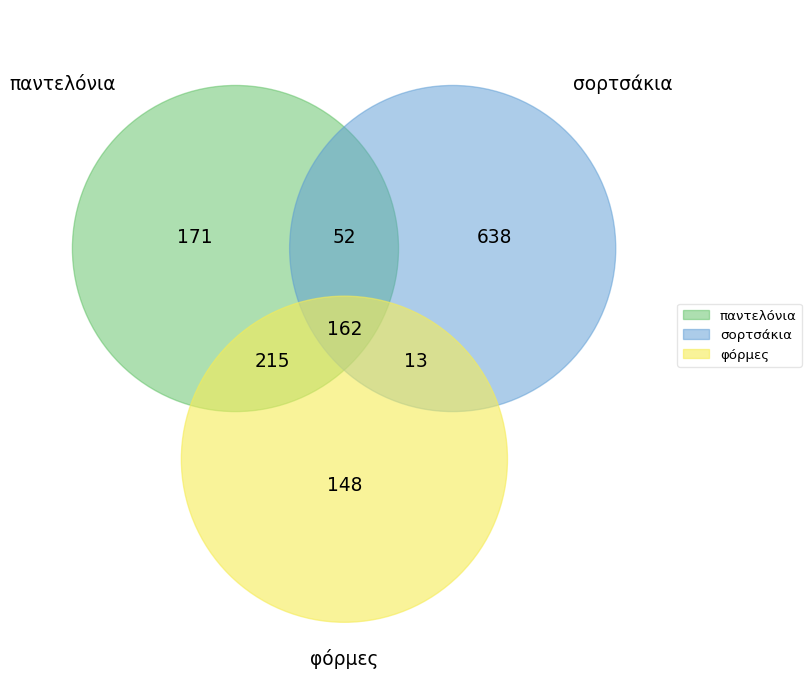

In [ ]:

labels = venn.get_labels([trousers_index, shorts_index, leg_index], fill=['number'])
fig, ax = venn.venn3(labels, names=['παντελόνια', 'σορτσάκια', 'φόρμες'])
fig.show()

In [ ]:
blou_items


['SHORTBLOUSES',
 'LONGBLOUSES',
 'MEDIUMBLOUSES',
 'KNEEBLOUSES',
 'CAPRIBLOUSES',
 '3/4LENGTHBLOUSES',
 'SHORTSLEEVEBLOUSES',
 'LONGSLEEVEBLOUSES',
 'TURNUPSLEEVEBLOUSES',
 'SLEEVELESSBLOUSES',
 'RAGLANSLEEVEBLOUSES',
 'CUPSLEEVEBLOUSES',
 '3/4FLAREDBLOUSES',
 'FLAREDBLOUSES',
 'POLOCOLLARBLOUSES',
 'SHIRTCOLLARBLOUSES',
 'FLATKNITTEDRIBBLOUSES',
 'MAOCOLLARBLOUSES',
 'STANDUPCOLLARBLOUSES',
 'ROUNDNECKBLOUSES',
 'COLLARBLOUSES',
 'TURTLENECKBLOUSES',
 'HOODEDBLOUSES',
 'VNECKBLOUSES',
 'OFFSHOULDERBLOUSES',
 'HALTERNECKBLOUSES']

In [ ]:
venn.venn4

<function __main__.venn.venn4>

# stop

In [ ]:
labels = venn.get_labels([coat_index, shirt_index, skirt_index], fill=['number'])
fig, ax = venn.venn3(labels, names=['skirt', 'dress', 'trousers'])
fig.show()

In [ ]:
labels = venn.get_labels([pyjama_index, dress_index, trousers_index, skirt_index,shirt_index], fill=['number'])
fig, ax = venn.venn5(labels, names=['pyjamas', 'dress', 'trousers', 'skirt','shirt'])
fig.show()

In [ ]:
items = merged.loc[only_sw]
items.values
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
princ = pca.fit_transform(items.values)
print(princ)
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(princ[:,0], princ[:,1])
plt.show()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,max_iter=500)
kmeans.fit(items.values)
y_kmeans = kmeans.predict(items.values)
plt.scatter(princ[:, 0], princ[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
items

In [ ]:

indexes = np.where(y_kmeans==0)

images = url[indexes]

# only s words

In [ ]:
# PYJAMAS - done
only_py1 = set(pyjama_index) - set(trousers_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(coat_index) - set(blou_index)-set(shorts_index)-set(track_index)
only_py2 = merged.loc[merged['PYJAMAS']>=1].index.tolist()
only_py = list(only_py1.union(only_py2) - set([3673]))
print(len(only_py))

110


In [ ]:
# SKIRT + DRESS  - done
only_sd1 = (set(skirt_index) & set(dress_index)) - set(trousers_index) - set(shirt_index) - set(pyjama_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(coat_index) - set(blou_index)-set(shorts_index)-set(track_index)
only_sd2 = set(merged.loc[merged['SKIRT']>=1].index.tolist())
only_sd3 = set(merged.loc[merged['DRESS']>=1].index.tolist())
only_sd = only_sd1.union(only_sd2)
only_sd = list(only_sd.union(only_sd3))
print(len(only_sd))

1206


In [ ]:
# SHORTS  - done
only_shorts1 = set(shorts_index) - set(trousers_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(coat_index) - set(blou_index)-set(pyjama_index)-set(track_index)
only_shorts2 = set(merged.loc[merged['SHORTS']>=1].index.tolist())
only_shorts = list(only_shorts1.union(only_shorts2) - set([468]))

len(only_shorts)

197

In [ ]:
# SWIMMING  - done
only_sw1 = set(sw_index) - set(trousers_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(shorts_index) - set(coat_index) - set(blou_index)-set(pyjama_index)-set(track_index)
only_sw2 = merged[(merged['SWIMSUIT']>=1) | (merged['BIKINI']>=1)].index.tolist()
only_sw = list(only_sw1.union(only_sw2) - set([4023,4042,4043,4069,4079,4080,4083,4084,4085,4086,4087,4088]))

len(only_sw)

81

In [ ]:
# TROUSERS - done
only_trousers = list(set(trousers_index) - set(shorts_index) - set(coat_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index)  - set(blou_index)-set(pyjama_index)-set(track_index))
only_trousers = merged.loc[only_trousers][merged.loc[only_trousers]['BIKINI']<1].index.tolist()
len(only_trousers)

213

In [ ]:
# COATS  - done
only_coats = list(set(coat_index) - set([2201,2209,2210,2211,2212,2213,2215,2216,2218,2229])- set(trousers_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(shorts_index) - set(blou_index)-set(pyjama_index)-set(track_index))
len(only_coats)

118

In [ ]:
# ROMPER  - done
only_ro = list(set(ro_index) -set(trousers_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(coat_index)- set(cardigan_index)- set(sw_index) - set(shorts_index) - set(blou_index)-set(pyjama_index)-set(track_index)- set([1536,1540,1541,1543,1552,1553,1555,1556,1584,81,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1463,1464,1465,1466,1468,1469,1472,1480,1478,1481,1483,1528]))
len(only_ro)

187

In [ ]:
# SHIRTS - done
only_shirts = list(set(shirt_index) - set(trousers_index) - set(dress_index) - set(coat_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(shorts_index) - set(blou_index)-set(pyjama_index)-set(track_index))
only_shirts =  merged.loc[only_shirts][merged.loc[only_shirts]['SHIRT']==1].index.tolist()
only_shirts = list(set(only_shirts) - set([2054,2065,2069,2077,2082,2108,2117,199,200,207,213,214,217,224,229,1989,1990,1992]))
len(only_shirts)

147

In [ ]:
# BLOUS  - done
only_blou = list(set(blou_index) - set(trousers_index) - set(dress_index) - set(coat_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(shorts_index) - set(track_index)-set(pyjama_index)-set(shirt_index))
len(only_blou)

333

In [ ]:
# leggings  - done
only_leg = list(set(leg_index) - set(blou_index)- set(trousers_index) - set(dress_index) - set(coat_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(shorts_index) - set(track_index)-set(pyjama_index)-set(shirt_index)- set([2201,2209,2210,2211,2212,2213,2215,2216,2218,2229])- set([2054,2065,2069,2077,2082,2108,2117,199,200,207,213,214,217,224,229,1989,1990,1992]) - set([142,146,387,3722,3721,3641,3671,3669,3668,3670,3635]))
len(only_leg)

105

# stop 

In [ ]:
df = pd.DataFrame(columns=['id','category'])


for i in only_leg:
  df = df.append(pd.DataFrame(data=[[i,'leg']],columns=['id','category']))
for i in only_blou:
  df = df.append(pd.DataFrame(data=[[i,'blou']],columns=['id','category']))
for i in only_shirts:
  df = df.append(pd.DataFrame(data=[[i,'shirts']],columns=['id','category']))
for i in only_ro:
  df = df.append(pd.DataFrame(data=[[i,'ro']],columns=['id','category']))
for i in only_trousers:
  df = df.append(pd.DataFrame(data=[[i,'trousers']],columns=['id','category']))
for i in only_shorts:
  df = df.append(pd.DataFrame(data=[[i,'shorts']],columns=['id','category']))
for i in only_coats:
  df = df.append(pd.DataFrame(data=[[i,'coats']],columns=['id','category']))
for i in only_sw:
  df = df.append(pd.DataFrame(data=[[i,'sw']],columns=['id','category']))
for i in only_sd:
  df = df.append(pd.DataFrame(data=[[i,'sd']],columns=['id','category']))
for i in only_py:
  df = df.append(pd.DataFrame(data=[[i,'pyj']],columns=['id','category']))
df = df.reset_index()
df = df.drop(columns='index')
df.to_pickle('/content/drive/My Drive/id_category.pkl')

In [ ]:
pd.read_pickle('/content/drive/My Drive/id_category.pkl')


array(['leg', 'blou', 'shirts', 'ro', 'trousers', 'shorts', 'coats', 'sw',
       'sd', 'pyj'], dtype=object)

In [ ]:
images = url[only_blou]

In [ ]:
for i in range(len(images)):
  print(merged.loc[only_blou[i]][merged.loc[only_blou[i]]>=1])
  rec_cloth = images[i]
  print('-----------------')  
  image = io.imread(rec_cloth)
  plt.imshow(image)
  plt.show()

In [ ]:
url


In [ ]:
# create balanced data
import random
g = []
for i in range(len(dataset)):
  grad = 0.5 * ((i // int(len(dataset)/11)) )
  if grad <=5:
    g.append(grad)
  else:
    g.append(5)
print(g)
random.shuffle(g)
grades = g

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")

ax = sns.countplot(x="gradeUser", data=dataset)

In [ ]:
samp_sd = np.array(only_sd)
items = np.random.randint(len(samp_sd)-1, size=int(len(samp_sd)/5))
samp_sd = samp_sd[items]
len(samp_sd)

241

# generate data

In [ ]:
only_py
samp_sd
only_shorts
only_sw
only_trousers
only_coats
only_ro
only_shirts
only_blou
only_leg
dataset = data.drop_duplicates(subset='ImageSource',keep='first')

sd_dat = merged.loc[only_leg]

sd_dat

,SET,PYJAMAS,SKIRT,NAN,DRESS,TROUSERS,LEGGINGS,TRACKSUIT,CARDIGAN,ROMPER,SHIRTS,SHIRT,T-SHIRT,SHORT SET,TOP,JOGGERS,SKIRT SET,JACKET,SHORTS,BLOUSE,VEST,JEANS,SWEATSHIRT,BIKINI,BERMUDA SHORTS,JUMPSUIT,DUNGAREES,PLAYSUIT,SLEEVELESS BLOUSE,BOMBER JACKET,BLAZER,TUNIC,SWIMSUIT,SHORT LENGTH,MEDIUM LENGTH,KNEE LENGTH,LONG,CAPRI,3/4 LENGTH,SHORTSET,...,OFFSHOULDERSWIMMINGSUITS,HALTERNECKSWIMMINGSUITS,SHORTPYJAMAS,LONGPYJAMAS,MEDIUMPYJAMAS,KNEEPYJAMAS,CAPRIPYJAMAS,3/4LENGTHPYJAMAS,SHORTSLEEVEPYJAMAS,LONGSLEEVEPYJAMAS,TURNUPSLEEVEPYJAMAS,SLEEVELESSPYJAMAS,RAGLANSLEEVEPYJAMAS,CUPSLEEVEPYJAMAS,3/4FLAREDPYJAMAS,FLAREDPYJAMAS,POLOCOLLARPYJAMAS,SHIRTCOLLARPYJAMAS,FLATKNITTEDRIBPYJAMAS,MAOCOLLARPYJAMAS,STANDUPCOLLARPYJAMAS,ROUNDNECKPYJAMAS,COLLARPYJAMAS,TURTLENECKPYJAMAS,HOODEDPYJAMAS,VNECKPYJAMAS,OFFSHOULDERPYJAMAS,HALTERNECKPYJAMAS,RELAXED FIT,REGULAR FIT,SLIM FIT,CARGO,BIKER,ROUND NECK,COLLAR,V NECK,HOODED,OFF SHOULDER,HALTERNECK,TURTLENECK
3586,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3587,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3589,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3592,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3719,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3720,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
len(all_df)

9

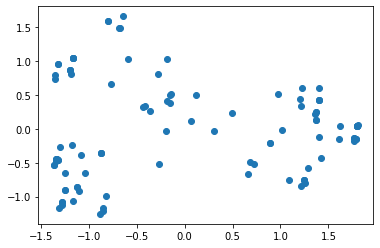

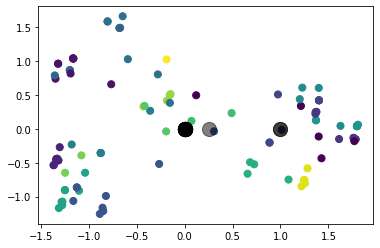

In [ ]:
items = sd_dat.values

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
princ = pca.fit_transform(items)

import numpy as np
import matplotlib.pyplot as plt
plt.scatter(princ[:,0], princ[:,1])
plt.show()
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++',n_clusters=20,max_iter=120)
kmeans.fit(items)
y_kmeans = kmeans.predict(items)
plt.scatter(princ[:, 0], princ[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
#shorts
#sw
#sd
# pyj
import random
g = list(map(lambda x: x+1, y_kmeans))
g = np.array(g)
total = len(g)
elem = np.unique(g)
indexes = []
for i in elem:
  indexes.append(np.where(g==i))
ratings = []
for i in range(100):
  random.shuffle(elem)
  r = np.zeros(total)
  for j in range(len(elem)):
    for k in range(len(indexes[j][0])):
      a = random.randint(1,4)*0.5
      r[indexes[j][0][k]] = elem[j] * 0.5 +a
    import random
    
  ratings.append(r)
ratings

[array([ 5. , 11.5,  7. , 10.5,  6.5, 11. ,  4. ,  7. , 10.5,  4.5,  3. ,
         8. ,  6.5,  7.5, 10. ,  5.5,  6.5,  7.5,  6.5,  3. ,  4.5,  5.5,
         7.5,  6.5,  6. ,  3. ,  4. ,  6.5,  3. ,  5.5,  6. ,  1.5,  3. ,
         1.5,  5.5,  9. ,  7.5,  4.5,  4.5, 10.5, 10.5,  5. , 10. ,  5. ,
         4.5,  3.5,  9. ,  8.5,  4.5,  3.5,  6. ,  4.5,  8.5,  5. ,  8.5,
         5. ,  5. ,  9. ,  4. ,  4. ,  2.5,  7.5,  6. , 10. ,  7.5,  9. ,
         3.5,  8. ,  2. ,  3.5,  2. ,  1.5,  1.5,  1.5,  2.5,  7. ,  1. ,
         2. ,  3.5,  3. ,  9. ,  3. ,  1.5,  2.5,  9. ,  6.5,  2.5,  3.5,
        10.5,  2. ,  2. ,  3.5, 10.5,  6.5,  6.5, 10.5,  3. , 10. ,  3.5,
        10.5,  7. ,  7.5,  7.5,  4. ,  5. ]),
 array([ 9.5,  8.5,  5. ,  9.5,  9.5, 10. ,  7.5,  6. , 10. ,  7. ,  7.5,
         5.5,  8.5, 10. ,  8.5,  8.5,  5. ,  6.5,  5. ,  7.5,  6.5,  9. ,
         6. ,  8.5,  8.5,  7. ,  7.5,  9. ,  6.5,  9. , 10. ,  8.5,  9. ,
         7.5,  7. ,  8. , 10. ,  4. ,  4.5,  2.5,  7. ,  6. ,  1.5

In [ ]:
all_items = sd_dat.index.tolist()
df = pd.DataFrame(columns=all_items)

ratings = np.array(ratings)
for i in range(len(df.columns)):
  list_ = ratings[:,i]
  items = np.random.randint(len(list_)-1, size=int(len(list_)))
  items = list(set(items))
  list_[items] = np.nan
  df[df.columns[i]] = list_

df.to_pickle('/content/drive/My Drive/sw_matrix.pkl')

In [ ]:
#all_df2 = []

In [ ]:
#all_df2.append(df)

In [ ]:
#pd.read_pickle('/content/drive/My Drive/sw_matrix.pkl')

In [ ]:
def user_cloth_rating_dataframe(df):
  dataset = pd.DataFrame(columns=['userId','clothId','rating'])
  users = df.index.tolist()
  for i in users:
    row = df.iloc[i].tolist()
    cols = df.columns.tolist()
    for j in range(len(row)):
      if np.isnan(row[j]) == False:
        user = i
        item = cols[j]
        rating = row[j]
        dataset = dataset.append(pd.DataFrame({'userId': [user],'clothId': [item],'rating': [rating]}))
  return dataset

In [ ]:
df2 = user_cloth_rating_dataframe(df)
df2= df2.reset_index()
df2 = df2.drop(columns='index')
df2.to_pickle('/content/drive/My Drive/sw_user_item_rating.pkl')

In [ ]:
#all_df = []

In [ ]:
all_df.append(df2)

In [ ]:
df2

,userId,clothId,rating
0,0,3587,11.5
1,0,3594,4.0
2,0,3595,7.0
3,0,3598,3.0
4,0,3599,8.0
...,...,...,...
3867,99,3718,3.0
3868,99,3719,8.5
3869,99,3720,7.5
3870,99,174,10.0


# stop here

In [ ]:
pd.concat(all_df)

,userId,clothId,rating
0,0,48,10.0
1,0,53,9.5
2,0,4149,3.0
3,0,64,8.5
4,0,4161,12.0
...,...,...,...
3867,99,3718,3.0
3868,99,3719,8.5
3869,99,3720,7.5
3870,99,174,10.0


In [ ]:
df_ = pd.concat(all_df)
df_pro = []
users = df_['userId'].unique()

for i in users:
  df_tmp = df_.copy()
  df_tmp = df_tmp.loc[df_tmp['userId'] == i].drop_duplicates(subset='clothId',keep='first')
  df_pro.append(df_tmp)

df_pro = pd.concat(df_pro)
df_pro = df_pro.reset_index().drop(columns='index')

In [ ]:
df_pro.to_pickle('/content/drive/My Drive/smallfulltsifsaBROKEN.pkl')


In [ ]:
df_pro

,userId,clothId,rating
0,0,48,10.0
1,0,53,9.5
2,0,4149,3.0
3,0,64,8.5
4,0,4161,12.0
...,...,...,...
63000,99,3718,3.0
63001,99,3719,8.5
63002,99,3720,7.5
63003,99,174,10.0


In [ ]:
df2.loc[df2['userId'] == 0].drop_duplicates(subset='clothId')

In [ ]:
g = list(map(lambda x: x+1, y_kmeans))
g = list(map(lambda x: x*0.5, g))
len(g)

93

In [ ]:
g = np.array(list(map(lambda x: x+1, y_kmeans)))

for i in g:
  indexes = np.where(g==i)[0]

  gen =[]
  for i in range(len(indexes)):
    grad = 0.5 * ((i // int(len(indexes)/9)) )
    if grad <=5:
      gen.append(grad)
    else:
      gen.append(5.0)
  g[indexes] = gen


In [ ]:
for i in g:
  print(i)

3
10
10
2
10
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
1
2
1
1
2
2
2
1
3
2
10
2
2
2
2
2
2
10
10
1
2
1
2
2
2
1
6
6
6
6
7
7
7
4
7
4
4
4
4
4
5
4
4
2
9
3
2
2
5
5
5
5
7
7
4
9
8
8
7
7
8
9
9
9
9
9
3
3
3
3
3
3
3


In [ ]:
sd_dat

In [ ]:
np.array([]).append(1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

regr = RandomForestRegressor(n_estimators=30,max_depth=5,criterion='mse', random_state=0)
# split data
train_X, test_X, train_y, test_y = train_test_split(sd_dat, ratings[15], test_size=0.50, random_state=0)
# train 
regr.fit(train_X,train_y)
# predict
y_pred = regr.predict(test_X)

print(mean_squared_error(test_y,y_pred)**(1/2))

1.1802885638812755


In [ ]:
mean_absolute_error(test_y,y_pred)

0.6060515873015873

In [ ]:
train_X['y'] = train_y
ax = sns.countplot(x="y", data=train_X)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf

model = Sequential()
model.add(Dense(256, input_shape=(411, ), activation='tanh',kernel_initializer='glorot_normal', name='dense_1'))
model.add(Dropout(0.05))
#model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(256, activation='tanh',kernel_initializer='glorot_normal', name='dense_2'))
model.add(Dropout(0.05))
model.add(Dense(256, activation='tanh',kernel_initializer='glorot_normal', name='dense_3'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

train_X, test_X, train_y, test_y = train_test_split(sd_dat, ratings[0], test_size=0.50, random_state=0)
# train 
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min',restore_best_weights=True)
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

history = model.fit(np.array(train_X.values), np.array(train_y), epochs=100,callbacks=[earlyStopping,reduce_lr_loss], validation_split=0.05)
# predict
y_pred = model.predict(test_X)

# result dataframe
df = pd.DataFrame(columns=['clothId','y_pred','y_true'])
df['clothId'] = test_X.index.tolist()
df['y_true'] = test_y
df['y_pred'] = y_pred
mean_squared_error(test_y,y_pred)**(1/2)
mean_absolute_error(test_y,y_pred)

Epoch 1/100
2/2 [==============================] - 0s 65ms/step - loss: 7.9234 - mse: 7.9234 - val_loss: 0.2072 - val_mse: 0.2072
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 1.8657 - mse: 1.8657 - val_loss: 0.9478 - val_mse: 0.9478
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 2.2540 - mse: 2.2540 - val_loss: 0.7348 - val_mse: 0.7348
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 1.2792 - mse: 1.2792 - val_loss: 0.1729 - val_mse: 0.1729
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.6221 - val_mse: 0.6221
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 0.8434 - mse: 0.8434 - val_loss: 0.5995 - val_mse: 0.5995
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 0.5373 - mse: 0.5373 - val_loss: 0.2613 - val_mse: 0.2613
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2397 - mse: 0.23

0.6753287974824297

In [ ]:
path = '/content/drive/My Drive/insanetsifsaBROKEN.pkl'

cl_dat = pd.read_pickle(path)

all_items_ = cl_dat['clothId'].unique().tolist()

all_items_

categ = pd.read_pickle('/content/drive/My Drive/id_category.pkl')


In [ ]:
categ = categ.rename(columns={'clothId':'id'})

In [ ]:
i = categories.loc[categories['category'] == 'blou'].head(120).index.tolist()
categories = categories.drop(index=i)

In [ ]:
categories = pd.DataFrame()

categories['id'] = all_items_

categories = categories.merge(categ,on='id')

categories

translator_ = pd.read_pickle('/content/drive/My Drive/cat_translator.pkl')

categories_gr = []
 


In [ ]:
translator_

,category
gr,
κολλητές φόρμες,leg
μπλούζες,blou
πουκάμισα,shirts
μάλλινα,ro
παντελόνια,trousers
σορτσάκια,shorts
παλτά,coats
μαγιό,sw
φόρεματα,sd


In [ ]:
eng = categories['category'].tolist()
gr = []

for i in eng:
  if i == 'leg':
    gr.append('φόρμες')
  if i == 'blou':
    gr.append('μπλούζες')
  if i == 'shirts':
    gr.append('πουκάμισα')
  if i == 'ro':
    gr.append('μάλλινα')
  if i == 'trousers':
    gr.append('παντελόνια')
  if i == 'shorts':
    gr.append('σορτσάκια')
  if i == 'coats':
    gr.append('παλτά')
  if i == 'sw':
    gr.append('μαγιό')
  if i == 'sd':
    gr.append('φόρεματα')
  if i == 'pyj':
    gr.append('πυτζάμες')



In [ ]:
categories['category'] = gr

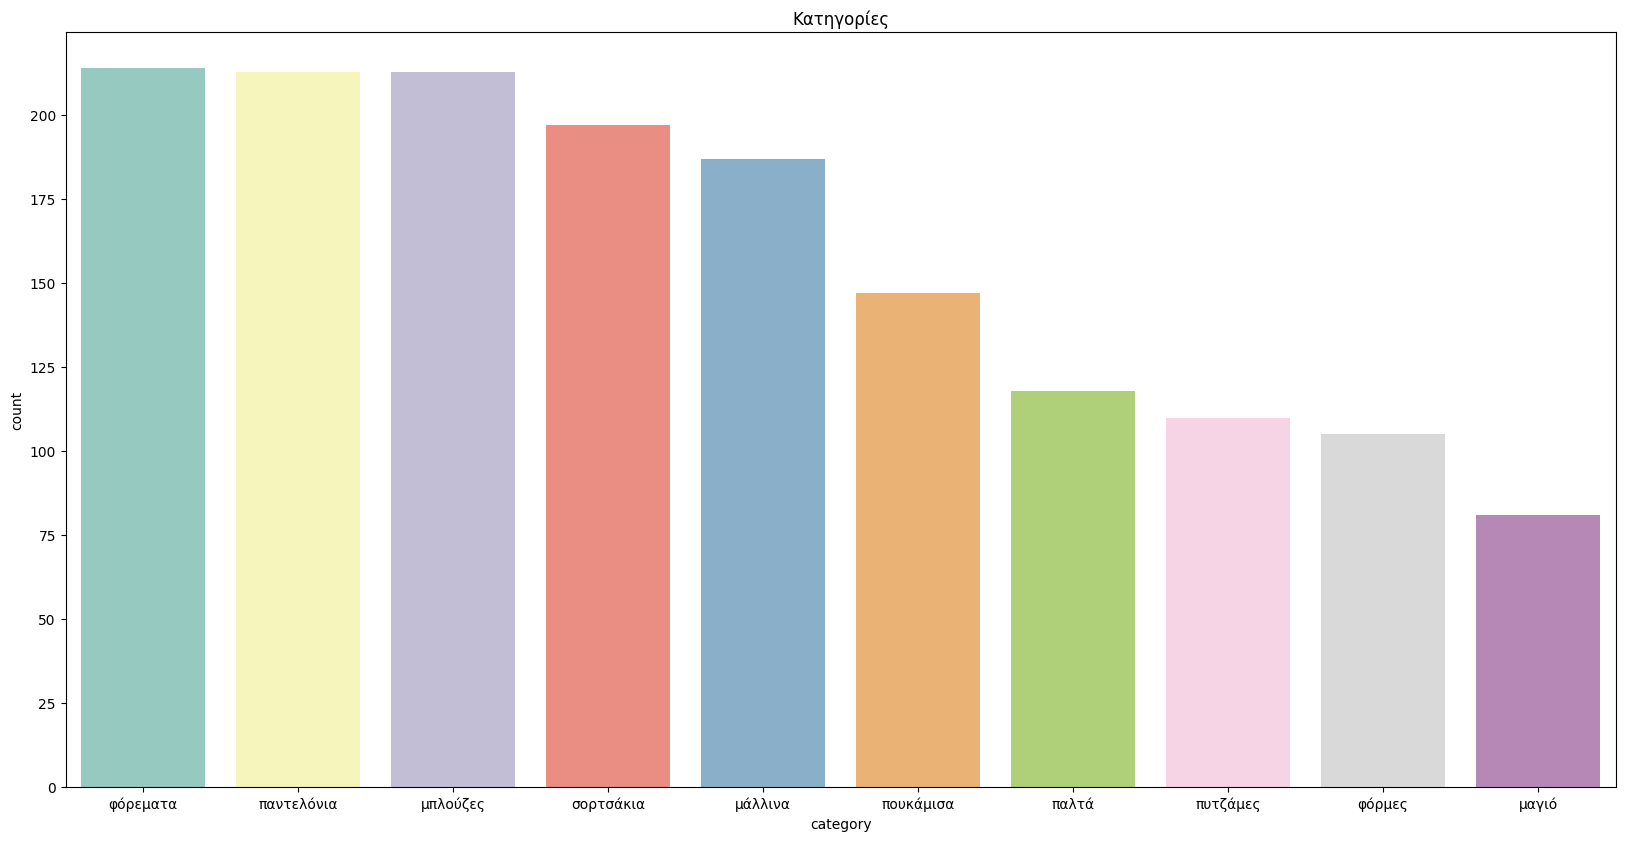

In [ ]:
figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')
sns.countplot(x='category', data=categories,palette="Set3",order = categories['category'].value_counts().index)
plt.title('Κατηγορίες')
plt.show()